# **Data Exploration**
---

### **Exploratory Data Analysis (EDA)**

Data exploration is only performed on the training dataset.

In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import pylab
import sys

#add the project source directory to the system path for importing custom utilities
sys.path.append("../src")

#import custom utility function from 'utils' module
import utils

In [2]:
config_data = utils.config_load()
config_data

{'raw_dataset_path': '../dataset/raw/credit_risk.csv',
 'dataset_path': '../dataset/output/data.pkl',
 'predictors_set_path': '../dataset/output/predictors.pkl',
 'response_set_path': '../dataset/output/response.pkl',
 'train_path': ['../dataset/output/X_train.pkl',
  '../dataset/output/y_train.pkl'],
 'test_path': ['../dataset/output/X_test.pkl', '../dataset/output/y_test.pkl'],
 'data_train_path': '../dataset/output/training_data.pkl',
 'data_train_binned_path': '../dataset/output/bin_training_data.pkl',
 'crosstab_list_path': '../dataset/output/list_crosstab.pkl',
 'WOE_table_path': '../dataset/output/WOE_table.pkl',
 'IV_table_path': '../dataset/output/IV_table.pkl',
 'WOE_map_dict_path': '../dataset/output/WOE_map_dict.pkl',
 'X_train_woe_path': '../dataset/output/X_train_woe.pkl',
 'response_variable': 'loan_status',
 'test_size': 0.2,
 'num_columns': ['person_age',
  'person_income',
  'person_emp_length',
  'loan_amnt',
  'loan_int_rate',
  'loan_percent_income',
  'cb_person_c

In [3]:
def concat_data(type):
    """
    Concat the input (X) and output (y) data and save the result
    
    Parameters
    ----------
    data_type : str
        A string indicating the type of data (train or test) 
    """
    #load input (X) and output (y) data
    X = utils.pickle_load(config_data[f'{type}_path'][0])
    y = utils.pickle_load(config_data[f'{type}_path'][1])
    
    #concatenate X and y
    data = pd.concat((X, y),
                     axis = 1)

    #display and validate data
    print(f'Data shape:', data.shape)

    #dump concatenated data
    utils.pickle_dump(data, config_data[f'data_{type}_path'])
   
    return data

In [4]:
#check the function for train data
data_train = concat_data(type='train')
data_train.head()

Data shape: (26064, 11)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
15884,25,241875,MORTGAGE,4.0,EDUCATION,16000,7.05,0.07,N,4,0
15138,21,18000,RENT,5.0,PERSONAL,1500,12.18,0.08,N,4,1
7474,25,53000,MORTGAGE,10.0,MEDICAL,16000,12.53,0.30,N,2,0
18212,28,16800,OWN,NaN,MEDICAL,5000,13.98,0.30,N,8,1
6493,25,50000,MORTGAGE,2.0,VENTURE,10000,7.90,0.20,N,2,0


#### Check for Missing Values

In [5]:
# Check for missing values
data_train.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              738
loan_intent                      0
loan_amnt                        0
loan_int_rate                 2501
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64

In [6]:
# Check for data type
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26064 entries, 15884 to 17068
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  26064 non-null  int64  
 1   person_income               26064 non-null  int64  
 2   person_home_ownership       26064 non-null  object 
 3   person_emp_length           25326 non-null  float64
 4   loan_intent                 26064 non-null  object 
 5   loan_amnt                   26064 non-null  int64  
 6   loan_int_rate               23563 non-null  float64
 7   loan_percent_income         26064 non-null  float64
 8   cb_person_default_on_file   26064 non-null  object 
 9   cb_person_cred_hist_length  26064 non-null  int64  
 10  loan_status                 26064 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.4+ MB


### **Check Correlation**

In [7]:
#display the column names of the training_data DataFrame
data_train.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [8]:
#initialize numeric and categoric column
num_columns = config_data['num_columns']
cat_columns = config_data['cat_columns']

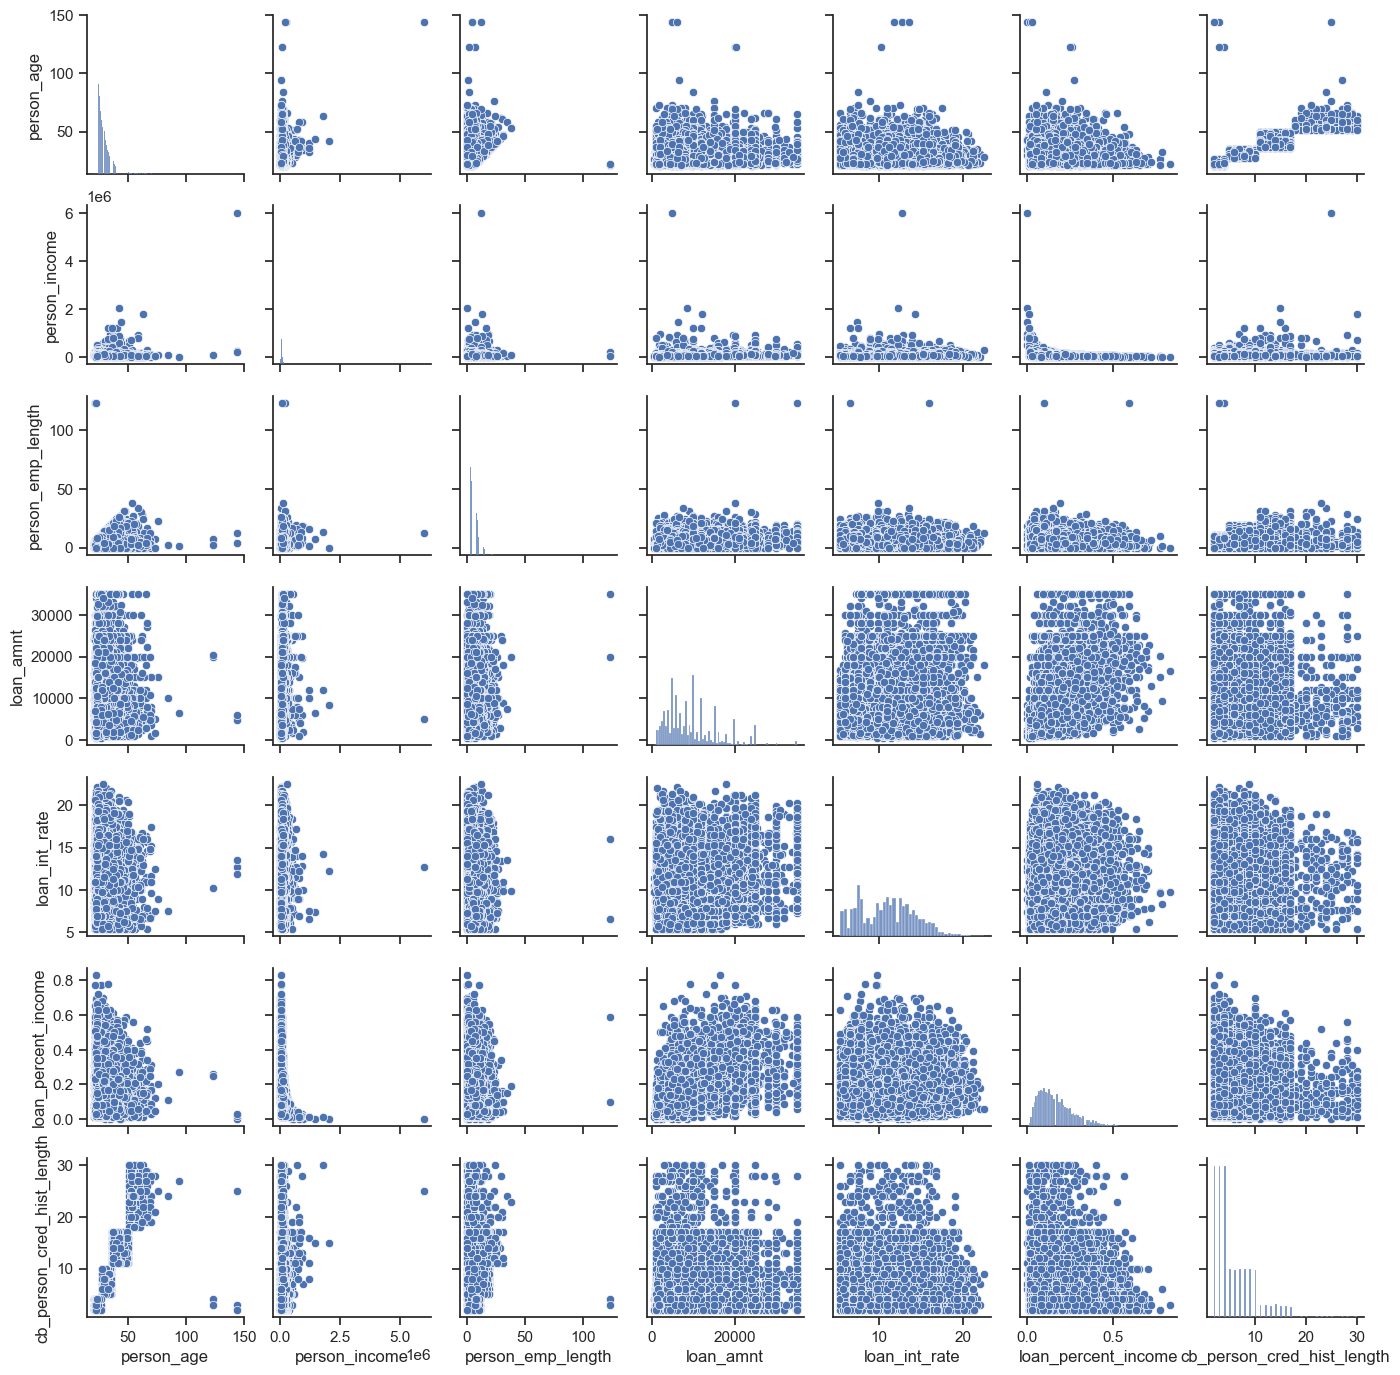

In [9]:
# Plot scatter plots for numerical columns
sns.set(style="ticks")
sns.pairplot(data_train[num_columns], height=2)
plt.show()

From the above chart, it can be observed that there is a relationship between the variables:
- Age & Income: Income tends to increase with age.

- Age & Employment Length: Older individuals tend to have longer employment lengths.

- Income & Loan Amount: Individuals with higher income tend to borrow more money.

- Interest Rate & Percentage of Income for Loan: The interest rate may be higher for loans that represent a larger percentage of income.

- Credit History Length & Age: Credit history length generally increases with age.

#### **Check Multicollinearity**

Next, calculate the Pearson correlation coefficient between numerical predictors.

In [10]:
config_data = utils.config_load()
config_data

{'raw_dataset_path': '../dataset/raw/credit_risk.csv',
 'dataset_path': '../dataset/output/data.pkl',
 'predictors_set_path': '../dataset/output/predictors.pkl',
 'response_set_path': '../dataset/output/response.pkl',
 'train_path': ['../dataset/output/X_train.pkl',
  '../dataset/output/y_train.pkl'],
 'test_path': ['../dataset/output/X_test.pkl', '../dataset/output/y_test.pkl'],
 'data_train_path': '../dataset/output/training_data.pkl',
 'data_train_binned_path': '../dataset/output/bin_training_data.pkl',
 'crosstab_list_path': '../dataset/output/list_crosstab.pkl',
 'WOE_table_path': '../dataset/output/WOE_table.pkl',
 'IV_table_path': '../dataset/output/IV_table.pkl',
 'WOE_map_dict_path': '../dataset/output/WOE_map_dict.pkl',
 'X_train_woe_path': '../dataset/output/X_train_woe.pkl',
 'response_variable': 'loan_status',
 'test_size': 0.2,
 'num_columns': ['person_age',
  'person_income',
  'person_emp_length',
  'loan_amnt',
  'loan_int_rate',
  'loan_percent_income',
  'cb_person_c

In [11]:
# Calculate Pearson correlation coefficient from numerical predictors
data_train_corr = data_train[num_columns].corr(method = 'pearson')
data_train_corr

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.183866,0.167790,0.055106,0.013178,-0.043330,0.852698
person_income,0.183866,1.000000,0.133317,0.260141,-0.002185,-0.249246,0.122060
person_emp_length,0.167790,0.133317,1.000000,0.114992,-0.057859,-0.051461,0.152044
loan_amnt,0.055106,0.260141,0.114992,1.000000,0.137254,0.571371,0.045249
loan_int_rate,0.013178,-0.002185,-0.057859,0.137254,1.000000,0.114216,0.015890
loan_percent_income,-0.043330,-0.249246,-0.051461,0.571371,0.114216,1.000000,-0.032525
cb_person_cred_hist_length,0.852698,0.122060,0.152044,0.045249,0.015890,-0.032525,1.000000


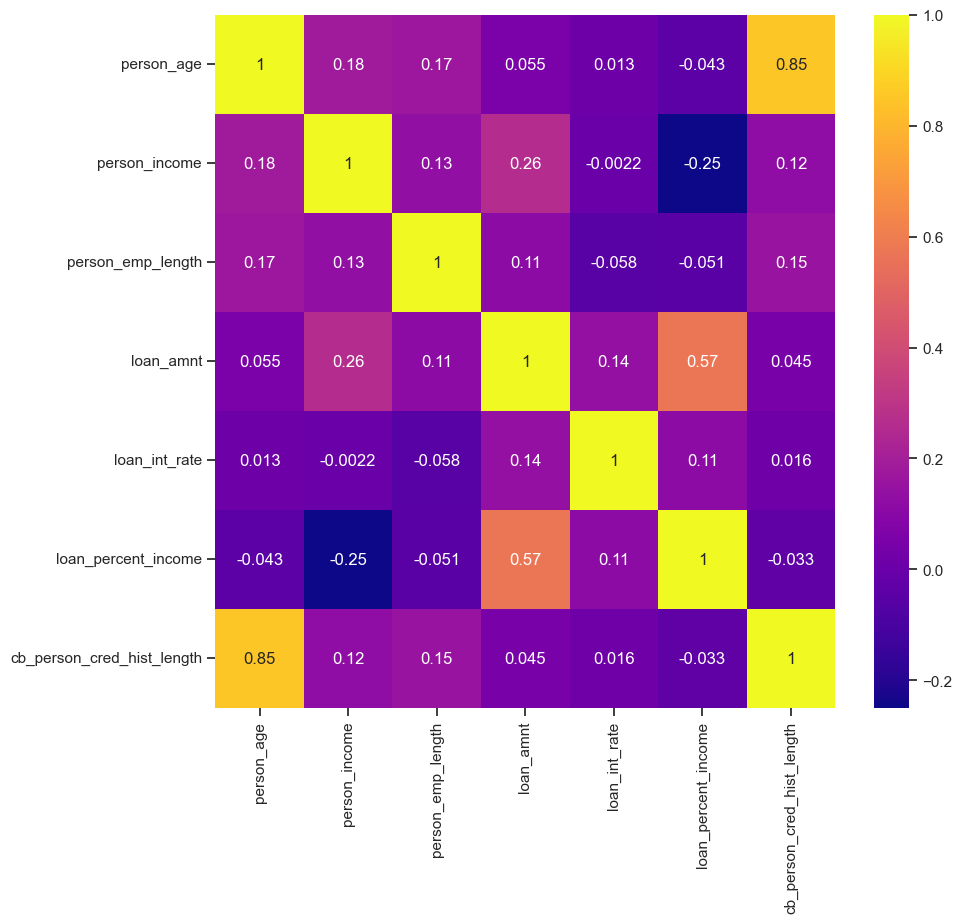

In [12]:
# Plot the heatmap correlation
plt.figure(figsize=(10, 9))
sns.heatmap(data=data_train_corr,
            cmap="plasma",
            annot=True)
plt.show()

We may have multicollinearity between `person_age` and `cb_person_cred_hist_length`.
- We will perform model selection or
- Exclude `cb_person_cred_hist_length`

In [13]:
#identify categorical columns (object-type) in the training_data DataFrame
cat_cols = [col for col in data_train.columns if data_train[col].dtypes == 'O']

#loop through each categorical column and print its value counts
for col in cat_cols:
    print(data_train[col].value_counts(), "\n")


RENT        13198
MORTGAGE    10687
OWN          2090
OTHER          89
Name: person_home_ownership, dtype: int64 

EDUCATION            5178
MEDICAL              4894
VENTURE              4572
PERSONAL             4378
DEBTCONSOLIDATION    4165
HOMEIMPROVEMENT      2877
Name: loan_intent, dtype: int64 

N    21453
Y     4611
Name: cb_person_default_on_file, dtype: int64 



Key Insights from Categorical Column Analysis:

- Home Ownership:
    - Dominated by individuals in the "RENT" category.
    - "OTHER" category has minimal representation.

- Loan Intent:
    - "EDUCATION" is the most common loan intent.
    - "HOMEIMPROVEMENT" has the lowest count.

- Default on File:
    - Majority have no default on file ("N").
    - Few individuals have a default on file ("Y").
